# [지도 학습]

## 4. Logistic Regression & Linear Regression

### 2) Linear Regression

In [1]:
# 최대 기온 예측 (MinTemp, MaxTemp만 사용)
# 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
# 데이터셋 로딩
dataset = pd.read_csv("./data/weather.csv")
dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [3]:
dataset["MinTemp"]

0       8.0
1      14.0
2      13.7
3      13.3
4       7.6
       ... 
361     9.0
362     7.1
363    12.5
364    12.5
365    12.3
Name: MinTemp, Length: 366, dtype: float64

In [4]:
dataset["MaxTemp"]

0      24.3
1      26.9
2      23.4
3      15.5
4      16.1
       ... 
361    30.7
362    28.4
363    19.9
364    26.9
365    30.2
Name: MaxTemp, Length: 366, dtype: float64

In [15]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


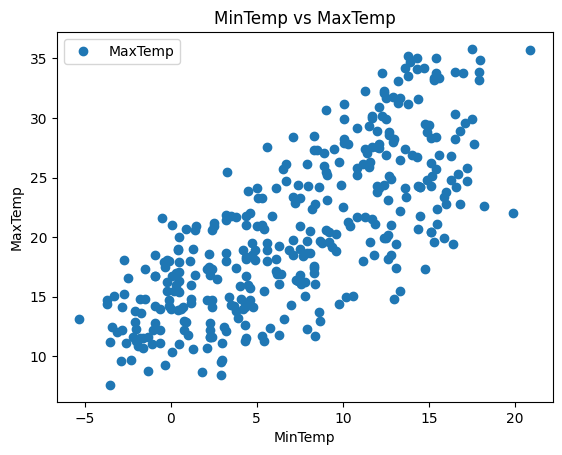

In [5]:
# 데이터간 관계를 시각화로 표현
dataset.plot(x="MinTemp", y="MaxTemp", style="o")
plt.title("MinTemp vs MaxTemp")
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")
plt.show()

In [6]:
# 데이터를 독립 변수와 종속 변수로 분리하고, 선형 회귀 모델 생성
X = dataset["MinTemp"].values.reshape(-1, 1)
y = dataset["MaxTemp"].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = LinearRegression() # 선형 회귀 클래스 가지고옴
regressor.fit(X_train, y_train) # fit() 사용해서 모델 훈련

LinearRegression()

In [7]:
X

array([[ 8. ],
       [14. ],
       [13.7],
       [13.3],
       [ 7.6],
       [ 6.2],
       [ 6.1],
       [ 8.3],
       [ 8.8],
       [ 8.4],
       [ 9.1],
       [ 8.5],
       [10.1],
       [12.1],
       [10.1],
       [12.4],
       [13.8],
       [11.7],
       [12.4],
       [15.6],
       [15.3],
       [16.4],
       [12.8],
       [12. ],
       [15.4],
       [15.6],
       [13.3],
       [12.9],
       [15.1],
       [13.6],
       [15.1],
       [11.6],
       [16.6],
       [13.3],
       [14.5],
       [16.3],
       [17.2],
       [16.5],
       [15. ],
       [14.9],
       [11.8],
       [11.7],
       [ 9.6],
       [ 8.9],
       [10.1],
       [15.5],
       [10.8],
       [ 7.5],
       [12.8],
       [12.6],
       [14.8],
       [19.9],
       [ 9.2],
       [12.4],
       [11.3],
       [ 9.8],
       [14.3],
       [15.1],
       [14.4],
       [15.4],
       [13.8],
       [13.6],
       [14.3],
       [15.9],
       [16.7],
       [12.1],
       [14

In [8]:
X.shape

(366, 1)

In [9]:
type(X)

numpy.ndarray

In [10]:
exp_x = dataset["MinTemp"].values.reshape(1, -1)
exp_x

array([[ 8. , 14. , 13.7, 13.3,  7.6,  6.2,  6.1,  8.3,  8.8,  8.4,  9.1,
         8.5, 10.1, 12.1, 10.1, 12.4, 13.8, 11.7, 12.4, 15.6, 15.3, 16.4,
        12.8, 12. , 15.4, 15.6, 13.3, 12.9, 15.1, 13.6, 15.1, 11.6, 16.6,
        13.3, 14.5, 16.3, 17.2, 16.5, 15. , 14.9, 11.8, 11.7,  9.6,  8.9,
        10.1, 15.5, 10.8,  7.5, 12.8, 12.6, 14.8, 19.9,  9.2, 12.4, 11.3,
         9.8, 14.3, 15.1, 14.4, 15.4, 13.8, 13.6, 14.3, 15.9, 16.7, 12.1,
        14.3, 16.5, 16.5, 17.5, 14.7, 17.5, 20.9, 17. , 16. , 15.4, 17.9,
        15.2, 15.1, 15.3, 17.2, 15.9, 10. ,  9.9, 10.3, 15.4, 12.7, 13.2,
        15.3, 17.9, 18. , 17.6, 16. , 14.9, 17.1, 18.2, 16.8, 13.6, 14.5,
        12.4, 10.4,  9.1,  8.9, 14.5, 12.6,  8.6, 10.8, 11.2, 12.1, 10.8,
        11.4, 12. , 16.3, 12.7, 12.7, 12. , 11.5, 13. , 11.7, 14.8,  7.7,
         4.4,  7.4,  8.3, 10.1, 12. , 12.9, 10.8,  9.5, 12.1, 12.5, 13.9,
        13.3, 13.2, 12.3, 13.8, 11.3, 11.7, 12.5, 15.1, 11.5, 13. , 11.6,
        12.8, 15.5, 13.1, 12.6,  4.4, 

In [11]:
exp_x.shape

(1, 366)

In [12]:
# 회귀 모델에 대한 예측
y_pred = regressor.predict(X_test)
df = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_pred.flatten()})
df

,Actual,Predicted
0,25.2,23.795434
1,20.2,25.345082
2,25.1,27.583463
3,19.0,15.616736
4,14.0,14.497546
...,...,...
69,20.9,15.788919
70,9.5,16.994201
71,21.1,27.841738
72,18.7,17.252476


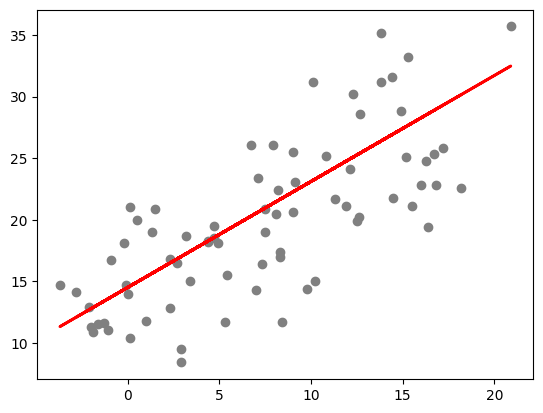

In [13]:
# 테스트 데이터셋을 사용한 회귀선 표현
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color="red", linewidth=2)
plt.show()

In [14]:
# 선형 회귀 모델 평가
print("평균제곱법: ", metrics.mean_squared_error(y_test, y_pred))
print("루트 평균제곱법: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)) )

평균제곱법:  20.375227929946803
루트 평균제곱법:  4.51389276899073
